In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Ellipse
import jupyterlab
!pip install torch torchvision
import torch
from scipy.stats import multivariate_normal

In [2]:
cov_blue = np.vstack(([1/8,0],[0,1/4]))
mean_blue = np.array(([0,0]))

In [3]:
cov_red = np.vstack(([2,0],[0,1/2]))
mean_red = np.array(([1,2]))

In [4]:
gaussian_red = np.random.multivariate_normal(mean=mean_red, cov=cov_red, size=100)

In [5]:
gaussian_blue = np.random.multivariate_normal(mean=mean_blue, cov=cov_blue, size=100)

In [6]:
ellipse_red = Ellipse(xy=(1,2), width=2*np.sqrt(2), height=2*np.sqrt(1/2),
                      edgecolor='r', fc='None', lw=1)
ellipse_blue=Ellipse(xy=(0,0), width=2*np.sqrt(1/8), height=2*np.sqrt(1/4),
                     edgecolor='b', fc='None', lw=1)

/tmp/ipykernel_9062/1613248164.py:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(gaussian_red[:,0], gaussian_red[:,1], 'bo', color='red', marker='.', markersize=10)
/tmp/ipykernel_9062/1613248164.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(gaussian_red[:,0], gaussian_red[:,1], 'bo', color='red', marker='.', markersize=10)
/tmp/ipykernel_9062/1613248164.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(gaussian_blue[:,0], gaussian_blue[:,1], 'bo', color='blue', marker='.', markersize=10)
/tmp/ipykernel_9062/1613248164.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt s

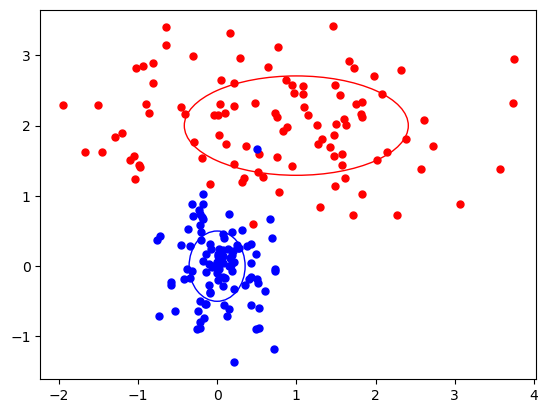

In [7]:
plt.figure()
plt.plot(gaussian_red[:,0], gaussian_red[:,1], 'bo', color='red', marker='.', markersize=10)
plt.plot(gaussian_blue[:,0], gaussian_blue[:,1], 'bo', color='blue', marker='.', markersize=10)
ax = plt.gca()
ax.add_patch(ellipse_blue)
ax.add_patch(ellipse_red)

In [8]:
label_1 = np.ones(100)
label_0 = np.zeros(100)
label_1 = label_1[:,np.newaxis]
label_0 = label_0[:,np.newaxis]

In [9]:
red_data = np.concatenate((gaussian_red, label_1), axis=1)

In [10]:
blue_data = np.concatenate((gaussian_blue, label_0), axis=1)

In [11]:
whole_data = np.vstack((red_data, blue_data))

In [12]:
whole_data = pd.DataFrame(whole_data) #in order to be able to order later or select sepcific columns and values

In [13]:
mean_blue = np.mean(blue_data[:,:2], axis=0)
mean_red = np.mean(red_data[:,:2], axis=0)

In [14]:
cov_blue = np.cov(blue_data[:,:2], rowvar=False)
cov_red = np.cov(red_data[:,:2], rowvar=False)

In [15]:
whole_space_x = np.random.uniform(low=-3., high=4., size=10000)
whole_space_y = np.random.uniform(low=-2., high=7., size=10000)

In [16]:
whole_space = np.vstack((whole_space_x,whole_space_y))
whole_space = np.transpose(whole_space)

/tmp/ipykernel_9062/1579428037.py:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(whole_space_x,whole_space_y, 'bo', marker='.')


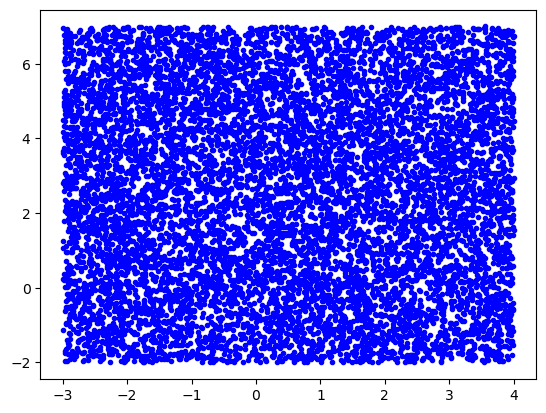

In [17]:
plt.plot(whole_space_x,whole_space_y, 'bo', marker='.')

In [18]:
def classifier_values(m, pi_m, mu_hat_m, sigma_hat_m,x_test):
    """compute the conditional density of y for a certain m given x

    Parameters:
    --------------------------
    m: int
    the class of y
    
    pi_m: float
    the probability of y belonging to the class

    mu_hat_m : array-like object
    the mean of the x's that have a y in the class m

    sigma_hat_m: 2-D array-like object
    the estimated covariance matrix for a certain class

    x_test: array-like object
    test input
    -------------------------
    """
    y = np.log(pi_m)*multivariate_normal.logpdf(x=x_test, mean=mu_hat_m, cov=sigma_hat_m)
    return y

In [19]:
#for the blue ones
dens_for_blue = np.zeros(10000)
for i in range(10000):
    dens_for_blue[i] = classifier_values(m=0,pi_m=1/2,
                                         mu_hat_m=mean_blue,sigma_hat_m=cov_blue,
                                         x_test=whole_space[i,:])

#for the red ones
dens_for_red = np.zeros(10000)
for i in range(10000):
    dens_for_red[i] = classifier_values(m=1,pi_m=1/2,
                                         mu_hat_m=mean_red,sigma_hat_m=cov_red,
                                         x_test=whole_space[i,:])

In [20]:
all_output = np.vstack((dens_for_blue,dens_for_red))
all_output = np.transpose(all_output)

In [21]:
retained_blue = np.empty(shape=(0,2))
retained_red = np.empty(shape=(0,2))

In [22]:
for i in range(10000):
    if all_output[i,0]>all_output[i,1]:
        retained_blue = np.vstack((retained_blue, whole_space[i,:]))
    else:
        retained_red = np.vstack((retained_red, whole_space[i,:]))

/tmp/ipykernel_9062/1375695321.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(gaussian_red[:,0], gaussian_red[:,1], 'bo', color='red', marker='.', markersize=10)
/tmp/ipykernel_9062/1375695321.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(gaussian_red[:,0], gaussian_red[:,1], 'bo', color='red', marker='.', markersize=10)
/tmp/ipykernel_9062/1375695321.py:4: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(gaussian_blue[:,0], gaussian_blue[:,1], 'bo', color='blue', marker='.', markersize=10)
/tmp/ipykernel_9062/1375695321.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt s

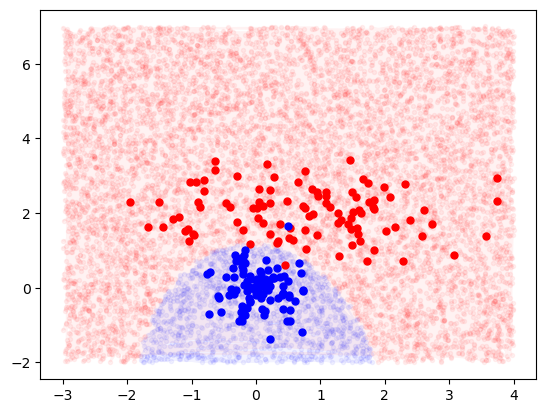

In [30]:
plt.plot(retained_blue[:,0], retained_blue[:,1], alpha=0.05, marker='.', color='r')
plt.plot(retained_red[:,0], retained_red[:,1], alpha=0.05, marker='.', color='b')
plt.plot(gaussian_red[:,0], gaussian_red[:,1], 'bo', color='red', marker='.', markersize=10)
plt.plot(gaussian_blue[:,0], gaussian_blue[:,1], 'bo', color='blue', marker='.', markersize=10)

In [24]:
retained_blue.shape

(8646, 2)

In [25]:
np.empty(shape=(0,2))

array([], shape=(0, 2), dtype=float64)

In [26]:
whole_space[1,:].shape

(2,)